# Motos Usadas

## Importación de datos

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from pycaret.regression import *
from sklearn import metrics
import pickle

In [2]:
data = pd.read_csv("../data/Used_Bikes.csv")

In [3]:
data

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [5]:
data.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


<AxesSubplot:ylabel='Density'>

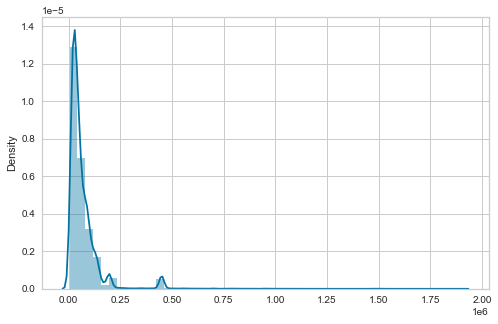

In [6]:
plt.figure(figsize = (8,5))
sns.distplot(x = data["price"])

In [7]:
data["price"].max()

1900000.0

In [8]:
data["price"].min()

4400.0

In [9]:
data.dtypes[data.dtypes == "object"].index

Index(['bike_name', 'city', 'owner', 'brand'], dtype='object')

In [10]:
data["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

In [11]:
data.replace({'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth Owner Or More':4}, inplace = True)

In [12]:
data.columns

Index(['bike_name', 'price', 'city', 'kms_driven', 'owner', 'age', 'power',
       'brand'],
      dtype='object')

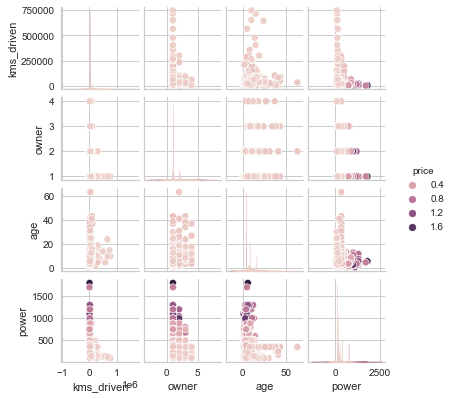

In [15]:
sns.pairplot(data, height = 1.4, hue = "price")

<AxesSubplot:>

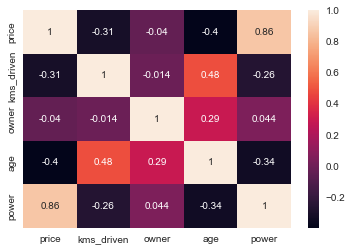

In [16]:
sns.heatmap(data.corr(), annot = True)

<AxesSubplot:xlabel='power', ylabel='price'>

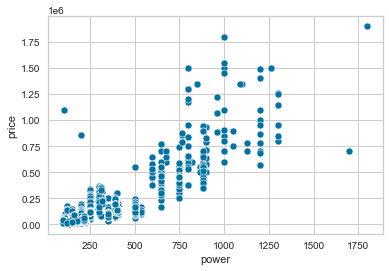

In [17]:
sns.scatterplot(x = data["power"], y = data["price"])

In [18]:
data.nunique()

bike_name      471
price         1232
city           443
kms_driven    3722
owner            4
age             35
power           53
brand           23
dtype: int64

#### Vamos a crear otro data para comparar entre uno con la variable "bike_name" y sin la variable "bike_name" y luego vemos si el modelo predice mejor con uno o con otro.

In [19]:
data_bike_name = data.copy()

In [20]:
data

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,1,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,1,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,1,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,1,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,1,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,1,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,1,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,1,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,1,16.0,125.0,Hero


In [21]:
data = pd.get_dummies(data)

In [22]:
data

,price,kms_driven,owner,age,power,bike_name_BMW F750 GS 850cc,bike_name_BMW G 310 GS,bike_name_BMW G 310 R,bike_name_BMW S 1000 RR Pro,bike_name_BMW S 1000 XR Pro,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,35000.0,17654.0,1,3.0,110.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,119900.0,11000.0,1,4.0,350.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,600000.0,110.0,1,8.0,675.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,65000.0,16329.0,1,4.0,180.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,80000.0,10000.0,1,3.0,150.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,39000.0,22000.0,1,4.0,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32644,30000.0,6639.0,1,9.0,180.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32645,60000.0,20373.0,1,6.0,220.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32646,15600.0,84186.0,1,16.0,125.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Creación del modelo de Machine Learning

In [23]:
x = data.drop(columns = "price")
y = data["price"]

In [24]:
x

,kms_driven,owner,age,power,bike_name_BMW F750 GS 850cc,bike_name_BMW G 310 GS,bike_name_BMW G 310 R,bike_name_BMW S 1000 RR Pro,bike_name_BMW S 1000 XR Pro,bike_name_Bajaj Pulsar 180cc,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,17654.0,1,3.0,110.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,11000.0,1,4.0,350.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,110.0,1,8.0,675.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16329.0,1,4.0,180.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,10000.0,1,3.0,150.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,22000.0,1,4.0,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32644,6639.0,1,9.0,180.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32645,20373.0,1,6.0,220.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32646,84186.0,1,16.0,125.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
y

0         35000.0
1        119900.0
2        600000.0
3         65000.0
4         80000.0
           ...   
32643     39000.0
32644     30000.0
32645     60000.0
32646     15600.0
32647     22000.0
Name: price, Length: 32648, dtype: float64

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state=2)

In [27]:
data

,price,kms_driven,owner,age,power,bike_name_BMW F750 GS 850cc,bike_name_BMW G 310 GS,bike_name_BMW G 310 R,bike_name_BMW S 1000 RR Pro,bike_name_BMW S 1000 XR Pro,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,35000.0,17654.0,1,3.0,110.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,119900.0,11000.0,1,4.0,350.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,600000.0,110.0,1,8.0,675.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,65000.0,16329.0,1,4.0,180.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,80000.0,10000.0,1,3.0,150.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,39000.0,22000.0,1,4.0,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32644,30000.0,6639.0,1,9.0,180.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32645,60000.0,20373.0,1,6.0,220.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32646,15600.0,84186.0,1,16.0,125.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
reg1 = setup(data, target = 'price', session_id=123, log_experiment=True, experiment_name='price')

In [29]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:53:11
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [30]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [31]:
best_model.score(xtest, ytest)

0.9938630313245417

In [32]:
xtest.iloc[0:1]

,kms_driven,owner,age,power,bike_name_BMW F750 GS 850cc,bike_name_BMW G 310 GS,bike_name_BMW G 310 R,bike_name_BMW S 1000 RR Pro,bike_name_BMW S 1000 XR Pro,bike_name_Bajaj Pulsar 180cc,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
28981,18742.0,1,6.0,150.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
ytest.iloc[0:5]

28981     45000.0
31252     95500.0
4246      65000.0
7070      50100.0
13201    123000.0
Name: price, dtype: float64

In [34]:
print(metrics.mean_squared_error(ytest, best_model.predict(xtest)))
print(metrics.mean_absolute_error(ytest, best_model.predict(xtest)))
print(metrics.r2_score(ytest, best_model.predict(xtest)))

49251482.995286874
709.9361117917306
0.9938630313245417


## Guardamos el modelo

In [37]:
with open('../model/modelo.h5', 'wb') as modelo:
    pickle.dump(best_model, modelo, protocol=pickle.HIGHEST_PROTOCOL)